In [115]:
import os

# Pobranie bieżącego katalogu
current_dir = os.getcwd()

# Sprawdzenie, czy już jesteśmy w "lab_2"
if current_dir.endswith("lab_2"):
    print("OK")
else:
    os.chdir("lab_2")
    print("lab_2 ustawione")


OK


In [116]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Excercise 1 -  Generated Quantities Block

In [117]:
gen_quant = CmdStanModel(stan_file='code_1.stan')


In [118]:
samples = gen_quant.sample(data={'M':5}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=1, 
                            chains = 1)

23:30:38 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

23:30:38 - cmdstanpy - INFO - CmdStan done processing.


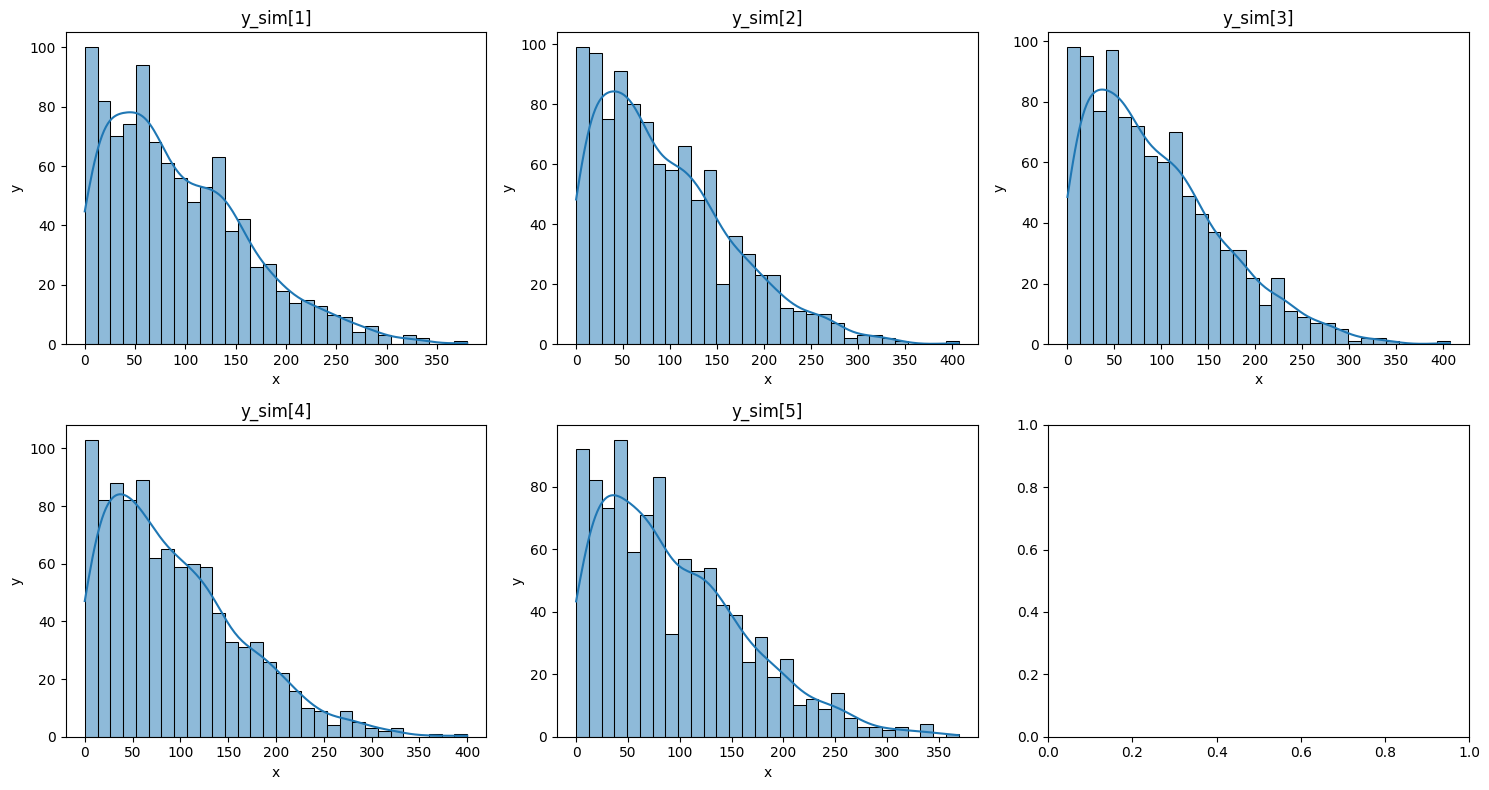

In [119]:
df = samples.draws_pd()

y_sim_columns = [col for col in df.columns if col.startswith('y_sim[')]


num_cols = len(y_sim_columns)

fig, axes = plt.subplots(nrows=num_cols // 3 + 1, ncols=3, figsize=(15, 5*num_cols//3))
axes = axes.flatten()  


for i, col in enumerate(y_sim_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])  
    axes[i].set_title(col)
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")


plt.tight_layout()
plt.show()

## Excercise 2 - Constraints on the data 

In [120]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})



23:30:39 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

23:30:39 - cmdstanpy - INFO - CmdStan done processing.


In [121]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

23:30:39 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

23:30:39 - cmdstanpy - INFO - CmdStan done processing.


## Excercise 3 - Constraints on parameters

### Unconstrained parameters

theta is unconstrained but drawn from a Gamma distribution, which is not defined for negative values. 
The sampler might propose invalid values (e.g., negative numbers), leading to warnings or inefficient sampling. 

 Adding real<lower=0> ensures theta is always positive. This improves inference by removing invalid proposals and making sampling more efficient.

In [122]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()




23:30:39 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

23:30:41 - cmdstanpy - INFO - CmdStan done processing.
23:30:41 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is -1.02689, but must be positive finite! (in 'code_4.stan', line 7, column 2 to column 28)
	Exception: gamma_lpdf: Random variable is -1.78608, but must be positive finite! (in 'code_4.stan', line 7, column 2 to column 28)
	Exception: gamma_lpdf: Random variable is -0.470662, but must be positive finite! (in 'code_4.stan', line 7, column 2 to column 28)
	Exception: gamma_lpdf: Random variable is -0.159341, but must be positive finite! (in 'code_4.stan', line 7, column 2 to column 28)
	Exception: gamma_lpdf: Random variable is -0.946698, but must be positive finite! (in 'code_4.stan', line 7, column 2 to column 28)
	Exception: gamma_lpdf: Random variable is -0.583674, but must be positive finite! (in 'code_4.stan', line 7, column 2 to column 28)
	Exception: gamma_lpdf: Random variable is -0.0157175, but must be positive finite! 

"Checking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n8442 of 6000 (140.70%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nRank-normalized split effective sample size satisfactory for all parameters.\n\nRank-normalized split R-hat values satisfactory for all parameters.\n\nProcessing complete.\n"

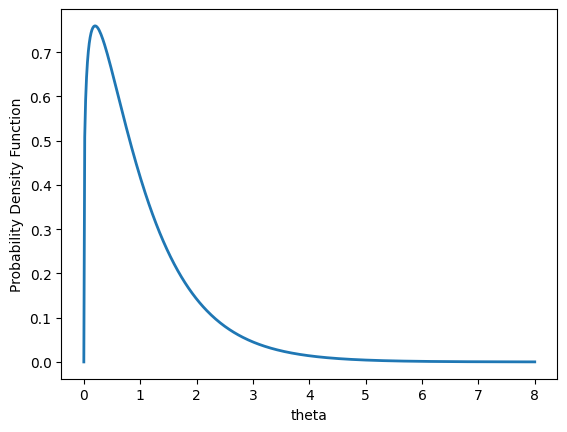

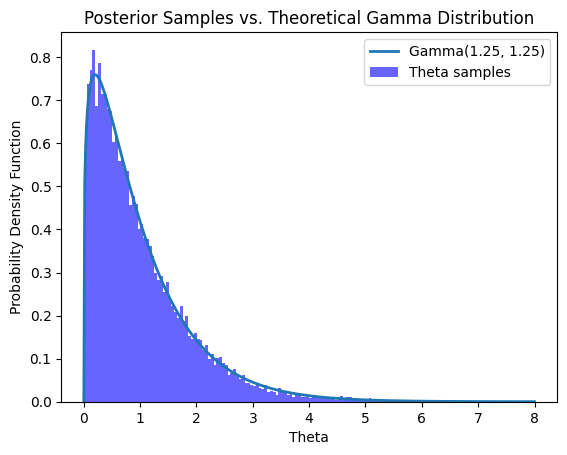

In [123]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()



samples_5 = out_gamma1.stan_variable("theta")  

N = 500
xs = np.linspace(0, 8, N)
pdfs = stats.gamma.pdf(xs, 1.25, scale=1 / 1.25)  

plt.plot(xs, pdfs, linewidth=2, label="Gamma(1.25, 1.25)")

plt.hist(samples_5, bins=160, density=True, alpha=0.6, color="blue", label="Theta samples")

# Formatting
plt.xlabel("Theta")
plt.ylabel("Probability Density Function")
plt.legend()
plt.title("Posterior Samples vs. Theoretical Gamma Distribution")
plt.show()


### Constrained parameter

In [124]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

23:30:42 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

23:30:43 - cmdstanpy - INFO - CmdStan done processing.
23:30:43 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'code_5.stan', line 7, column 2 to column 28)
Consider re-running with show_console=True if the above output is unclear!
23:30:43 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 3 had 2 divergent transitions (0.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


"Checking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 6000 (0.03%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nRank-normalized split effective sample size satisfactory for all parameters.\n\nRank-normalized split R-hat values satisfactory for all parameters.\n\nProcessing complete.\n"

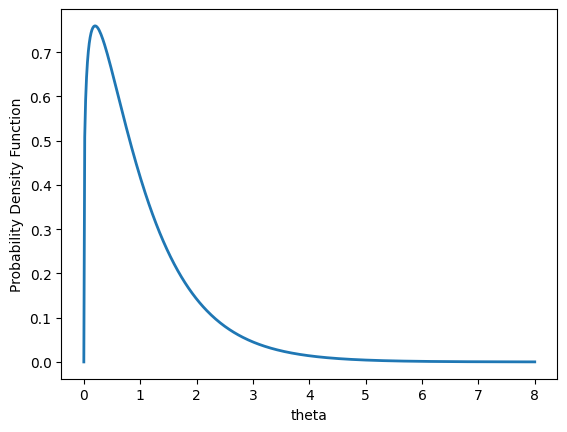

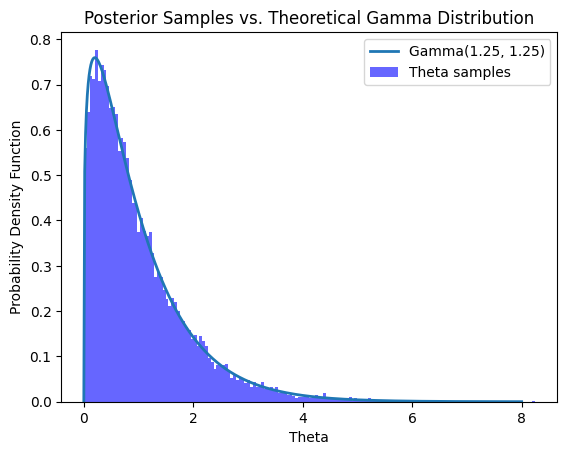

In [125]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


samples_5 = out_gamma2.stan_variable("theta")  

N = 500
xs = np.linspace(0, 8, N)
pdfs = stats.gamma.pdf(xs, 1.25, scale=1 / 1.25)  

plt.plot(xs, pdfs, linewidth=2, label="Gamma(1.25, 1.25)")

plt.hist(samples_5, bins=160, density=True, alpha=0.6, color="blue", label="Theta samples")

# Formatting
plt.xlabel("Theta")
plt.ylabel("Probability Density Function")
plt.legend()
plt.title("Posterior Samples vs. Theoretical Gamma Distribution")
plt.show()


## Excercise 4 -  Selection of parameters using equation solving



In [126]:
# Define the model
model_tune = CmdStanModel(stan_file='code_6.stan')


F = 5  
L = 6  
y0 = 1  


data = {
    'y_guess': [y0],  
    'theta': [(F + L) / 2] 
}

tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=2, chains=1)

# Extract and print the results
sigma = tunes.stan_variable('sigma')
print(f"Calculated standard deviation (sigma): {sigma}")

23:30:43 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

23:30:43 - cmdstanpy - INFO - CmdStan done processing.



Calculated standard deviation (sigma): [2.13523]


## Excercise 5 - different methods of defining models


In [127]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 14062002 #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data, seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)



23:30:44 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

23:30:44 - cmdstanpy - INFO - CmdStan done processing.
23:30:44 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

23:30:44 - cmdstanpy - INFO - CmdStan done processing.


23:30:44 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

23:30:44 - cmdstanpy - INFO - CmdStan done processing.


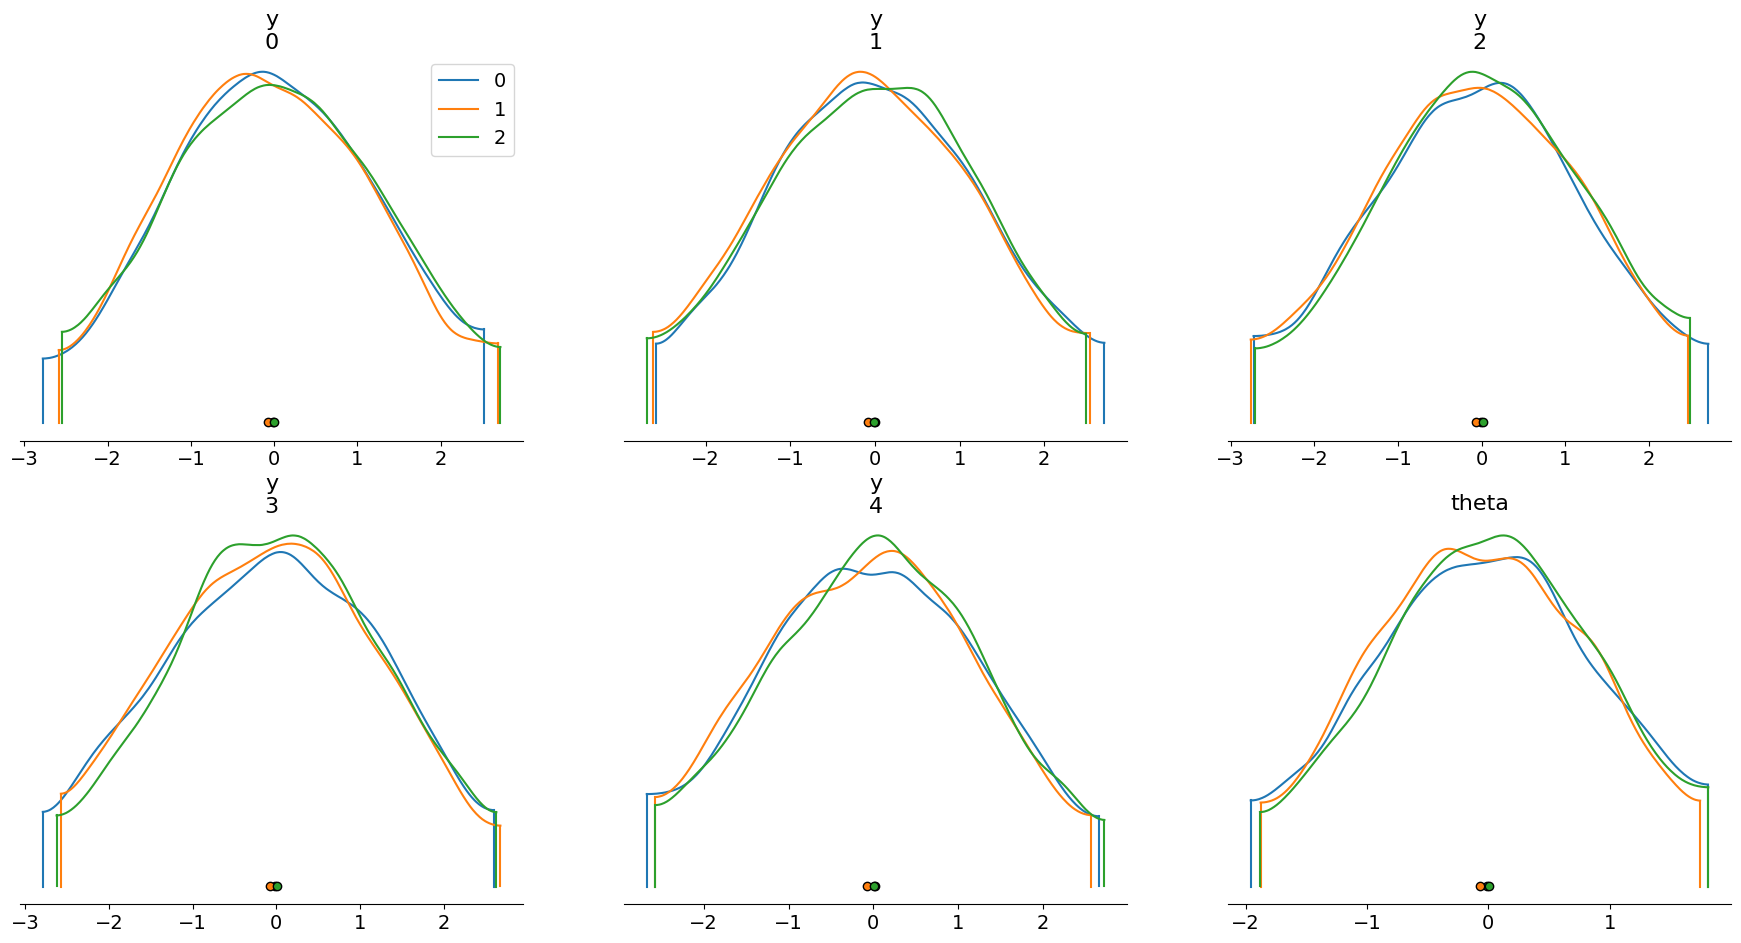

In [128]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

In [ ]:
# Załaduj model
model_gq = CmdStanModel(stan_file='code_10.stan')


fit = model_gq.sample(data=data, seed=14062002)

mean_of_y = model_gq.generate_quantities(data=data, previous_fit=fit)


print(mean_of_y)


23:30:45 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

23:30:45 - cmdstanpy - INFO - CmdStan done processing.
23:30:45 - cmdstanpy - INFO - Chain [1] start processing
23:30:45 - cmdstanpy - INFO - Chain [2] start processing
23:30:45 - cmdstanpy - INFO - Chain [3] start processing
23:30:45 - cmdstanpy - INFO - Chain [4] start processing
23:30:45 - cmdstanpy - INFO - Chain [3] done processing
23:30:45 - cmdstanpy - INFO - Chain [2] done processing
23:30:45 - cmdstanpy - INFO - Chain [1] done processing
23:30:45 - cmdstanpy - INFO - Chain [4] done processing



CmdStanGQ: model=code_10 chains=4['method=generate_quantities', 'fitted_params=/tmp/tmp8n0a1y3_/code_109dm3n6w1/code_10-20250323233045_1.csv']
 csv_files:
	/tmp/tmp8n0a1y3_/code_10hr2vo_3z/code_10-20250323233045_1.csv
	/tmp/tmp8n0a1y3_/code_10hr2vo_3z/code_10-20250323233045_2.csv
	/tmp/tmp8n0a1y3_/code_10hr2vo_3z/code_10-20250323233045_3.csv
	/tmp/tmp8n0a1y3_/code_10hr2vo_3z/code_10-20250323233045_4.csv
 output_files:
	/tmp/tmp8n0a1y3_/code_10hr2vo_3z/code_10-20250323233045_0-stdout.txt
	/tmp/tmp8n0a1y3_/code_10hr2vo_3z/code_10-20250323233045_1-stdout.txt
	/tmp/tmp8n0a1y3_/code_10hr2vo_3z/code_10-20250323233045_2-stdout.txt
	/tmp/tmp8n0a1y3_/code_10hr2vo_3z/code_10-20250323233045_3-stdout.txt
